# Import Packages

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read-IN-Data

In [75]:
Insecurity_households = pd.read_excel("C:/Users/Ivette/OneDrive/New folder/DSO 110 Final Project/Prevalence Food Insecurity & Very Low Food Security 2020.xlsx")
pd.set_option('display.max_columns', None)
Insecurity_households.head(10)

,Household composition,Food insecurity Thousands,Food insecurity Percent,Race/ethnicity of household persons,Food insecurity Thousands.1,Food insecurity Percent.1,Household income-to-poverty ratio,Food insecurity Thousands.2,Food insecurity Percent.2,Census geographic region,Food insecurity Thousands.3,Food insecurity Percent.3,Household composition VLFS,Very Low Food Security Thousands,Very Low Food Security Percent,Race/ethnicity of household persons VLFS,Very Low Food Security Thousands.1,Very Low Food Security Percent.1,Household income-to-poverty ratio VLFS,Very Low Food Security Thousands.2,Very Low Food Security Percent.2,Census geographic region VLFS,Very Low Food Security Thousands.3,Very Low Food Security Percent.3
0,Children less than 18,5623,14.8,White non-Hispanic,6079,7.1,Under 1.00,3714,35.3,Northeast,2070,9.3,Children less than 18,1457,3.8,White non-Hispanic,2532,3.0,Under 1.00,1511,14.4,Northeast,733.0,3.3
1,Children less than 6,2464,15.3,Black non-Hispanic,3628,21.7,Under 1.30,5453,33.1,Midwest,2643,9.5,Children less than 6,537,3.3,Black non-Hispanic,1333,8.0,Under 1.30,2146,13.0,Midwest,1227.0,4.4
2,Married couples w/children,2329,9.5,Hispanics,3184,17.2,Under 1.85,7344,28.6,South,6234,12.3,Married couples w/children,460,1.9,Hispanics,921,5.0,Under 1.85,2762,10.8,South,2179.0,4.3
3,Single women w/ children,2704,27.4,Other,861,8.8,1.85 and over,3447,4.9,West,2807,9.5,Single women w/ children,799,8.2,Other,354,3.6,1.85 and over,1164,1.6,West,1002.0,3.4
4,Single men w/children,538,16.3,Unknown,0,0.0,Income unknown,2962,8.7,Unknown,0,0.0,Single men w/children,181,5.5,Unknown,0,0.0,Income unknown,1214,3.6,Unknown,0.0,0.0
5,No children,8131,8.8,Unknown,0,0.0,Unknown,0,0.0,Unknown,0,0.0,No children,3684,4.0,Unknown,0,0.0,Unknown,0,0.0,Unknown,0.0,0.0
6,More than one adult,3887,7.1,Unknown,0,0.0,Unknown,0,0.0,Unknown,0,0.0,More than one adult,1640,3.0,Unknown,0,0.0,Unknown,0,0.0,Unknown,0.0,0.0
7,Women living alone,2302,11.0,Unknown,0,0.0,Unknown,0,0.0,Unknown,0,0.0,Women living alone,1073,5.1,Unknown,0,0.0,Unknown,0,0.0,Unknown,0.0,0.0
8,Men living alone,1941,11.4,Unknown,0,0.0,Unknown,0,0.0,Unknown,0,0.0,Men living alone,971,5.7,Unknown,0,0.0,Unknown,0,0.0,Unknown,0.0,0.0
9,Edlerly living alone,1286,8.3,Unknown,0,0.0,Unknown,0,0.0,Unknown,0,0.0,Edlerly living alone,531,3.4,Unknown,0,0.0,Unknown,0,0.0,NaN,NaN,NaN


# Data Cleaning

In [76]:
# looking for any missing data in the State_Data_Multiple_Years.xlsx
total = Insecurity_households.isnull().sum().sort_values(ascending=False)
percent = (Insecurity_households.isnull().sum()/Insecurity_households.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) #this gives you a column with missing values
missing_data.head(20)

,Total,Percent
Very Low Food Security Percent.3,1,0.1
Very Low Food Security Thousands.3,1,0.1
Census geographic region VLFS,1,0.1
Food insecurity Thousands,0,0.0
Very Low Food Security Percent.2,0,0.0
Very Low Food Security Thousands.2,0,0.0
Household income-to-poverty ratio VLFS,0,0.0
Very Low Food Security Percent.1,0,0.0
Very Low Food Security Thousands.1,0,0.0
Race/ethnicity of household persons VLFS,0,0.0


 # Univariate Analysis

## Common Data Types

In [77]:
#///////////////////////////////////////////////////#
# Data Types #
#//////////////////////////////////////////////////#

Insecurity_households.dtypes

Household composition                        object
Food insecurity Thousands                     int64
Food insecurity Percent                     float64
Race/ethnicity of household persons          object
Food insecurity Thousands.1                   int64
Food insecurity Percent.1                   float64
Household income-to-poverty ratio            object
Food insecurity Thousands.2                   int64
Food insecurity Percent.2                   float64
Census geographic region                     object
Food insecurity Thousands.3                   int64
Food insecurity Percent.3                   float64
Household composition VLFS                   object
Very Low Food Security Thousands              int64
Very Low Food Security Percent              float64
Race/ethnicity of household persons VLFS     object
Very Low Food Security Thousands.1            int64
Very Low Food Security Percent.1            float64
Household income-to-poverty ratio VLFS       object
Very Low Foo

In [78]:
Insecurity_households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Household composition                     10 non-null     object 
 1   Food insecurity Thousands                 10 non-null     int64  
 2   Food insecurity Percent                   10 non-null     float64
 3   Race/ethnicity of household persons       10 non-null     object 
 4   Food insecurity Thousands.1               10 non-null     int64  
 5   Food insecurity Percent.1                 10 non-null     float64
 6   Household income-to-poverty ratio         10 non-null     object 
 7   Food insecurity Thousands.2               10 non-null     int64  
 8   Food insecurity Percent.2                 10 non-null     float64
 9   Census geographic region                  10 non-null     object 
 10  Food insecurity Thousands.3              

<AxesSubplot:>

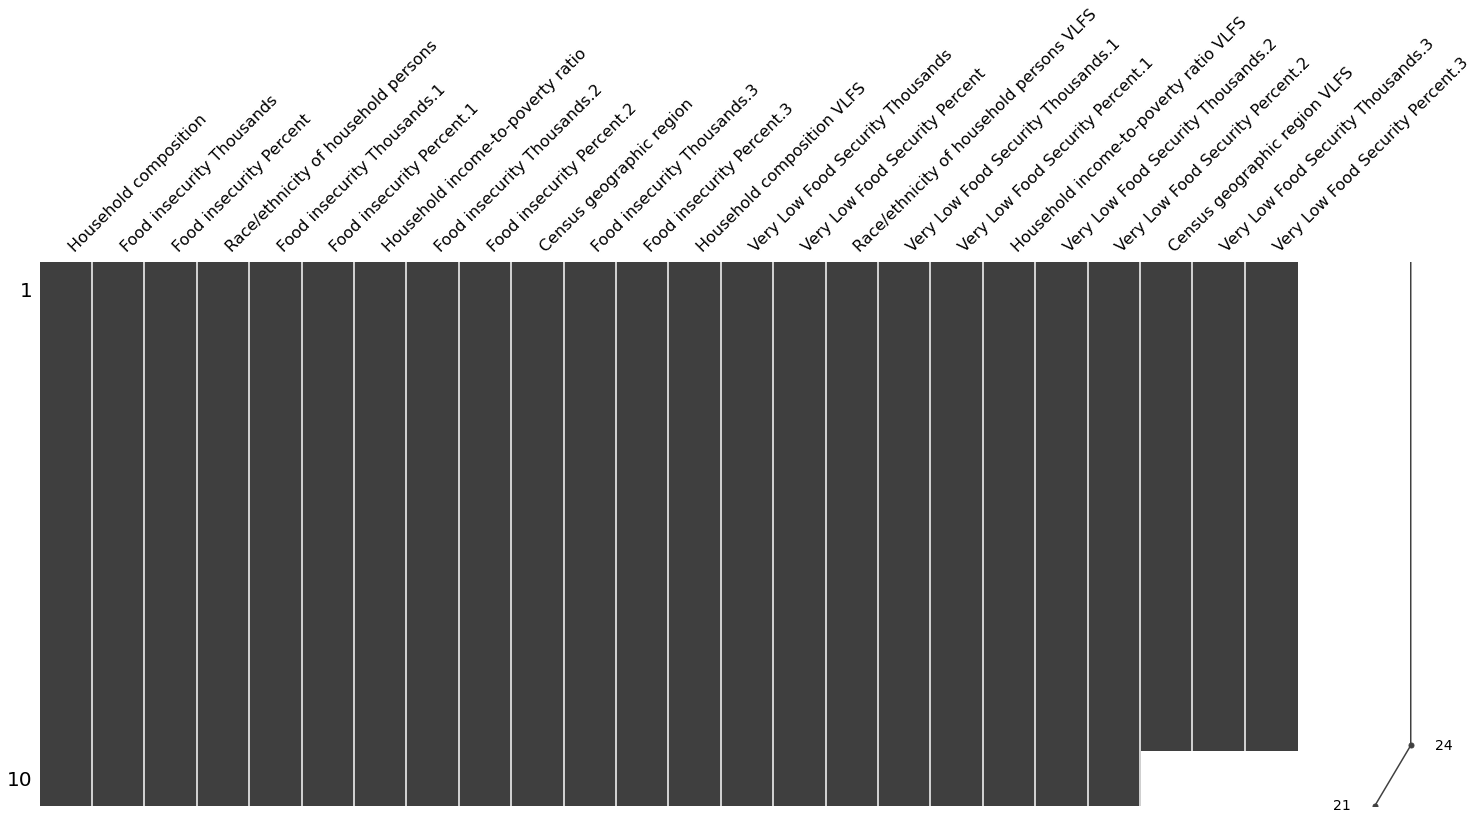

In [79]:
#//////////////////////////////////////////#
# Missing Values #
#/////////////////////////////////////////#

msno.matrix(Insecurity_households) 
##This shows how many variables are missing or how many rows are missing.
#The White signifies missing and the gray singnifies that the value is there.
##This is a very important step in any EDA(Exploratory Data Anaylsis) you want to make sure you understand exactly what's 
##missing that way as a Data Scienctist or Data Analysist you can determing what you want to do with this in the future!

<AxesSubplot:>

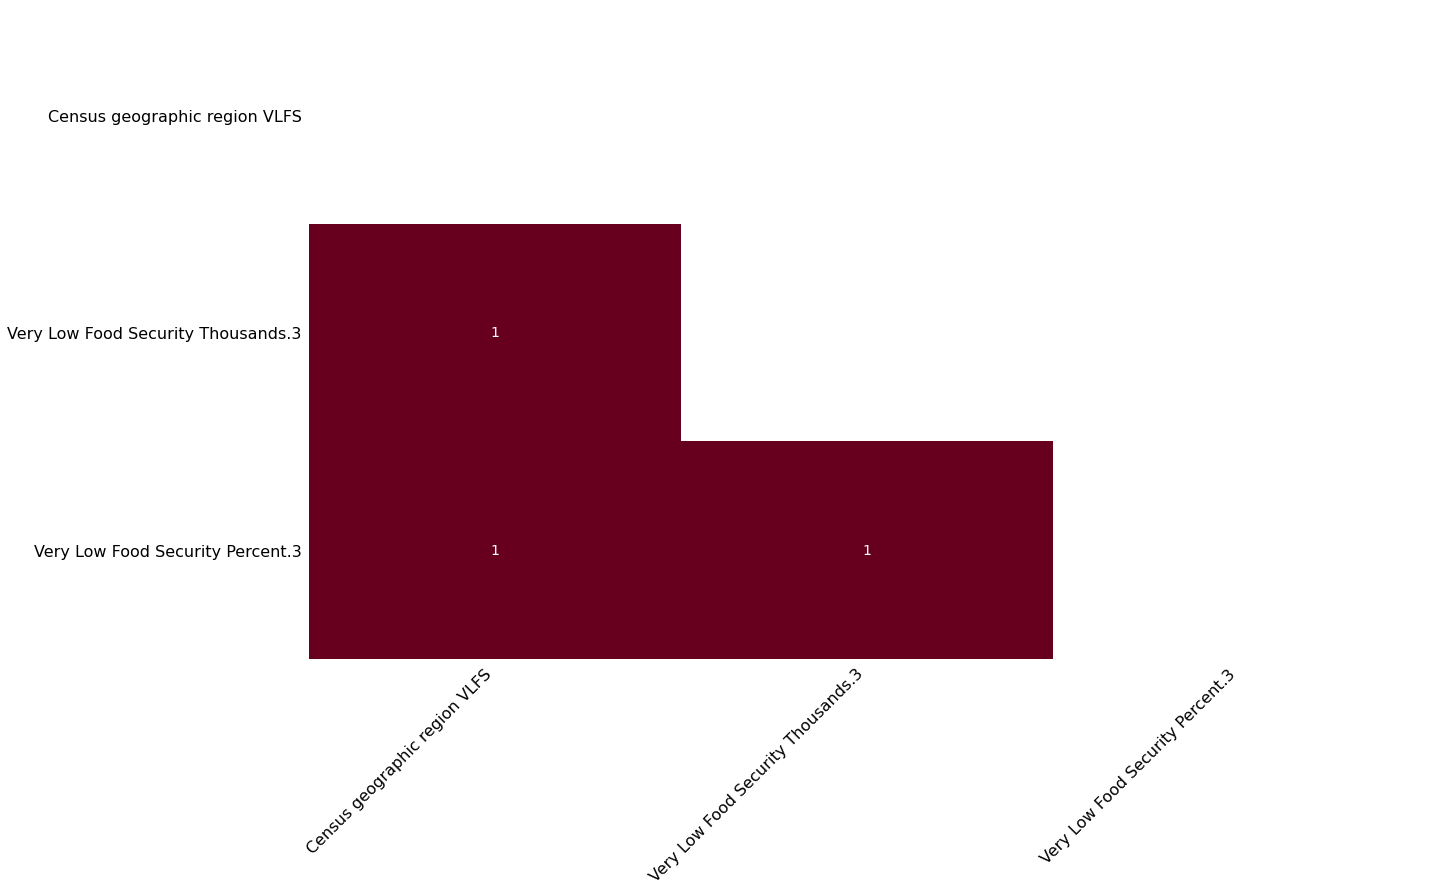

In [80]:
##Missing data heatmap
#Another cool feature that the missingno library has which allows you to creae a heat map

msno.heatmap(Insecurity_households)
#Get a heat map of the variables that have missing values in them and how they correlate to one another and the reason we have
##this is, this reason could be useful which can tell us if there are variables that have a correlation to one another
##when valus are missing.

# Numerical Data Types

In [81]:
#//////////////////////////////////////////#
# Quantile / Descriptive Statistics #
#/////////////////////////////////////////#

#The describe() function allows you to very quickly look @ some basic descriptive statistics for the numerical features 
#in the data sets. 

#Looking @ the count, mean, std(standard deviation),minimum and maximum.The first(25%), second(50%) and third(75%) are the 
##quartiles of our data, this will give you a good idea of how this data is distributed.

##These things broadly are the measures of central tendency really that refers to your mean and median which are
## the mean is (mean-3120.5) and the median is the 50%

Insecurity_households.describe()

,Food insecurity Thousands,Food insecurity Percent,Food insecurity Thousands.1,Food insecurity Percent.1,Food insecurity Thousands.2,Food insecurity Percent.2,Food insecurity Thousands.3,Food insecurity Percent.3,Very Low Food Security Thousands,Very Low Food Security Percent,Very Low Food Security Thousands.1,Very Low Food Security Percent.1,Very Low Food Security Thousands.2,Very Low Food Security Percent.2,Very Low Food Security Thousands.3,Very Low Food Security Percent.3
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000
mean,3120.500000,12.99000,1375.200000,5.480000,2292.000000,11.060000,1375.400000,4.060000,1133.300000,4.390000,514.000000,1.960000,879.700000,4.340000,571.222222,1.711111
std,2243.061759,5.96405,2162.407393,8.125926,2699.505181,15.041144,2084.202549,5.306642,1004.870257,1.787891,851.111039,2.839092,1033.174832,5.964376,779.279279,2.060003
min,538.000000,7.10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2031.250000,8.97500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,532.500000,3.325000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2396.500000,11.20000,0.000000,0.000000,1481.000000,2.450000,0.000000,0.000000,885.000000,3.900000,0.000000,0.000000,582.000000,0.800000,0.000000,0.000000
75%,3591.250000,15.17500,2603.250000,8.375000,3647.250000,23.625000,2499.750000,9.450000,1361.000000,5.400000,779.250000,3.450000,1436.750000,9.000000,1002.000000,3.400000
max,8131.000000,27.40000,6079.000000,21.700000,7344.000000,35.300000,6234.000000,12.300000,3684.000000,8.200000,2532.000000,8.000000,2762.000000,14.400000,2179.000000,4.400000


# Examine all Columns for Normality

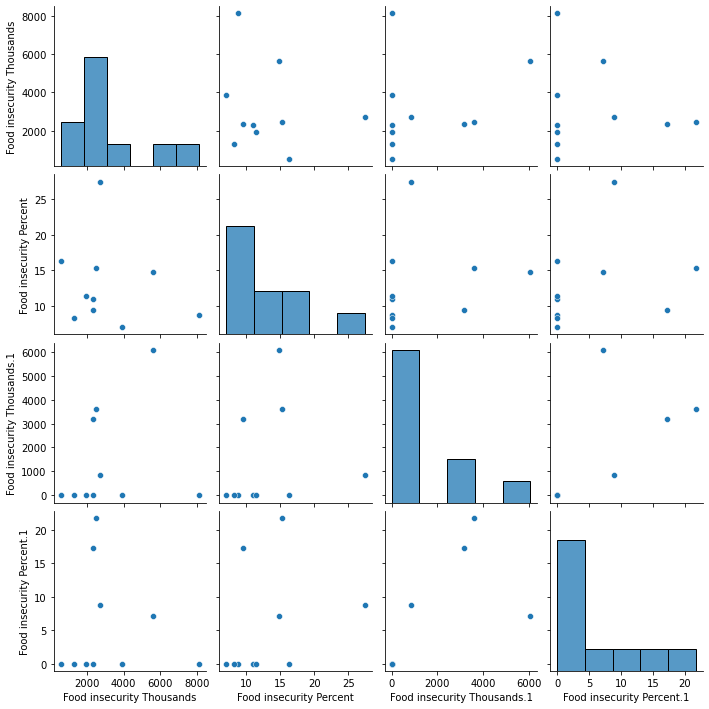

In [82]:
sns.pairplot(Insecurity_households[['Household composition', 'Food insecurity Thousands','Food insecurity Percent', 'Race/ethnicity of household persons','Food insecurity Thousands.1', 'Food insecurity Percent.1',]])

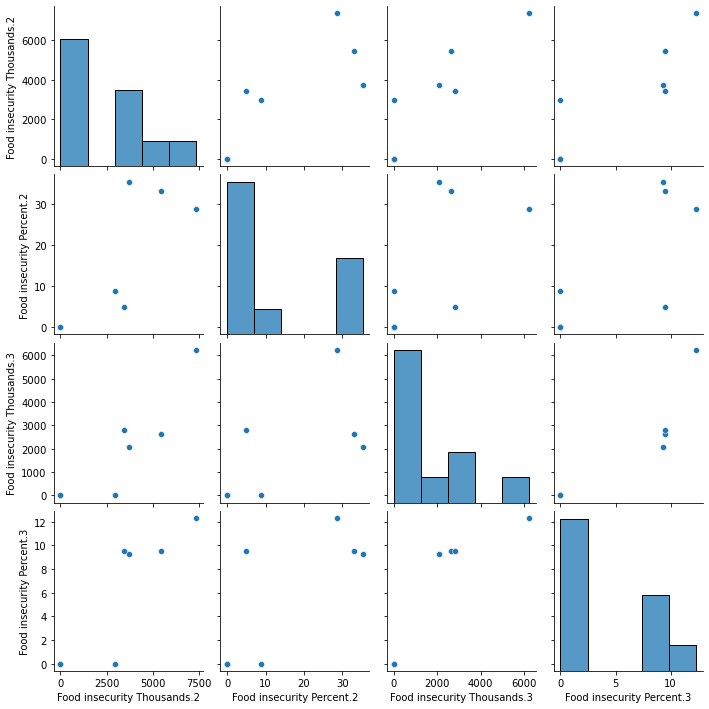

In [83]:
sns.pairplot(Insecurity_households[['Household income-to-poverty ratio', 'Food insecurity Thousands.2','Food insecurity Percent.2', 'Census geographic region','Food insecurity Thousands.3', 'Food insecurity Percent.3']])

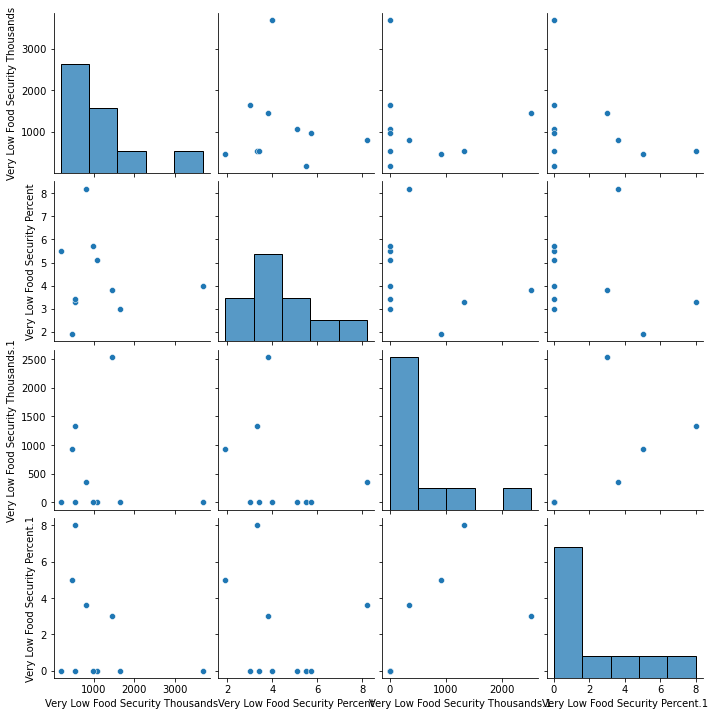

In [84]:
sns.pairplot(Insecurity_households[['Household composition VLFS', 'Very Low Food Security Thousands','Very Low Food Security Percent','Race/ethnicity of household persons VLFS','Very Low Food Security Thousands.1','Very Low Food Security Percent.1']])

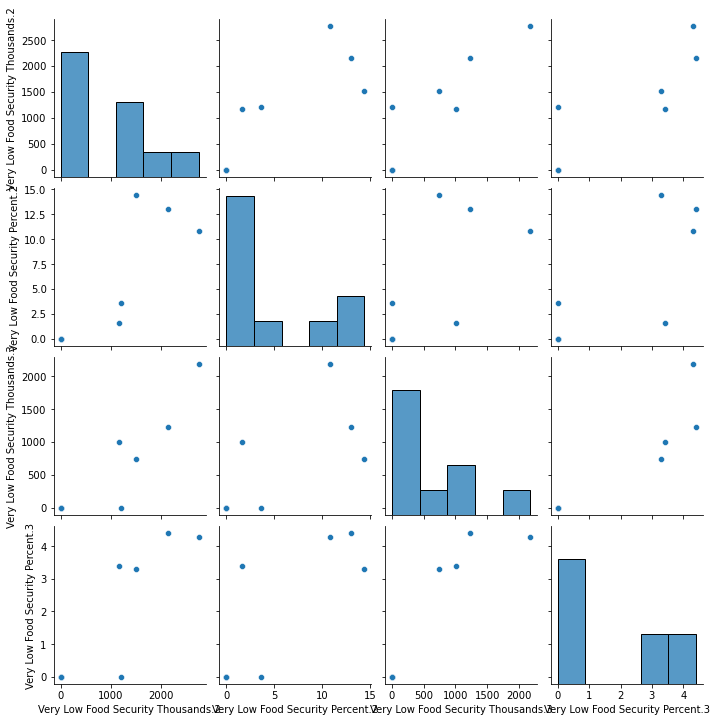

In [85]:
sns.pairplot(Insecurity_households[['Household income-to-poverty ratio VLFS','Very Low Food Security Thousands.2','Very Low Food Security Percent.2', 'Census geographic region VLFS','Very Low Food Security Thousands.3','Very Low Food Security Percent.3']])

# Bar Charts

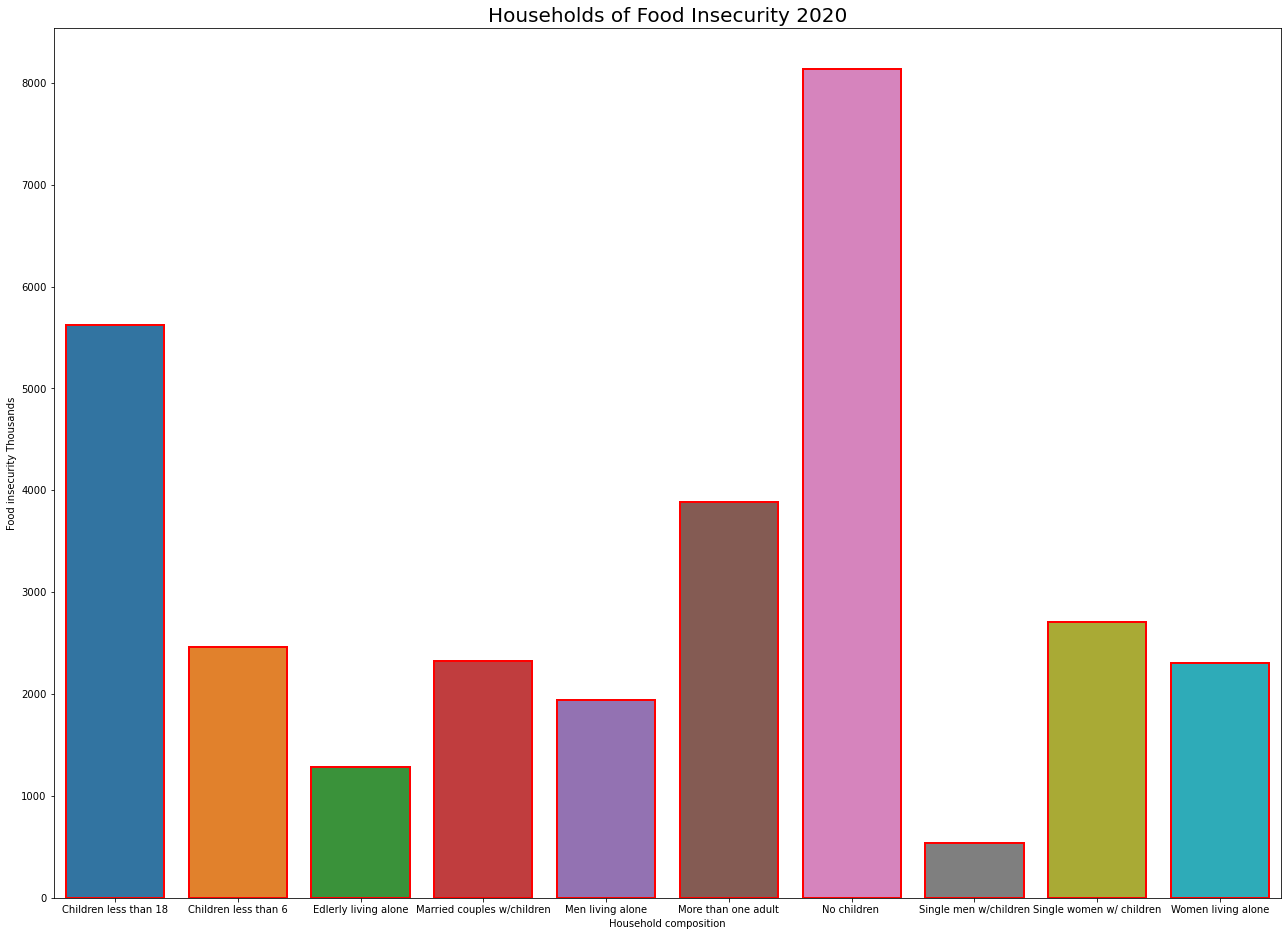

In [93]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Household composition').max()[['Food insecurity Thousands', 'Very Low Food Security Thousands']].sort_values(by = ['Household composition'], ascending = True).reset_index()
fig = plt.figure(figsize=(22,16))
plt.title("Households of Food Insecurity 2020", size = 20)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Food insecurity Thousands", x = "Household composition", linewidth = 2, edgecolor = 'red')
plt.xlabel("Household composition")
plt.ylabel("Food insecurity Thousands")
plt.show()

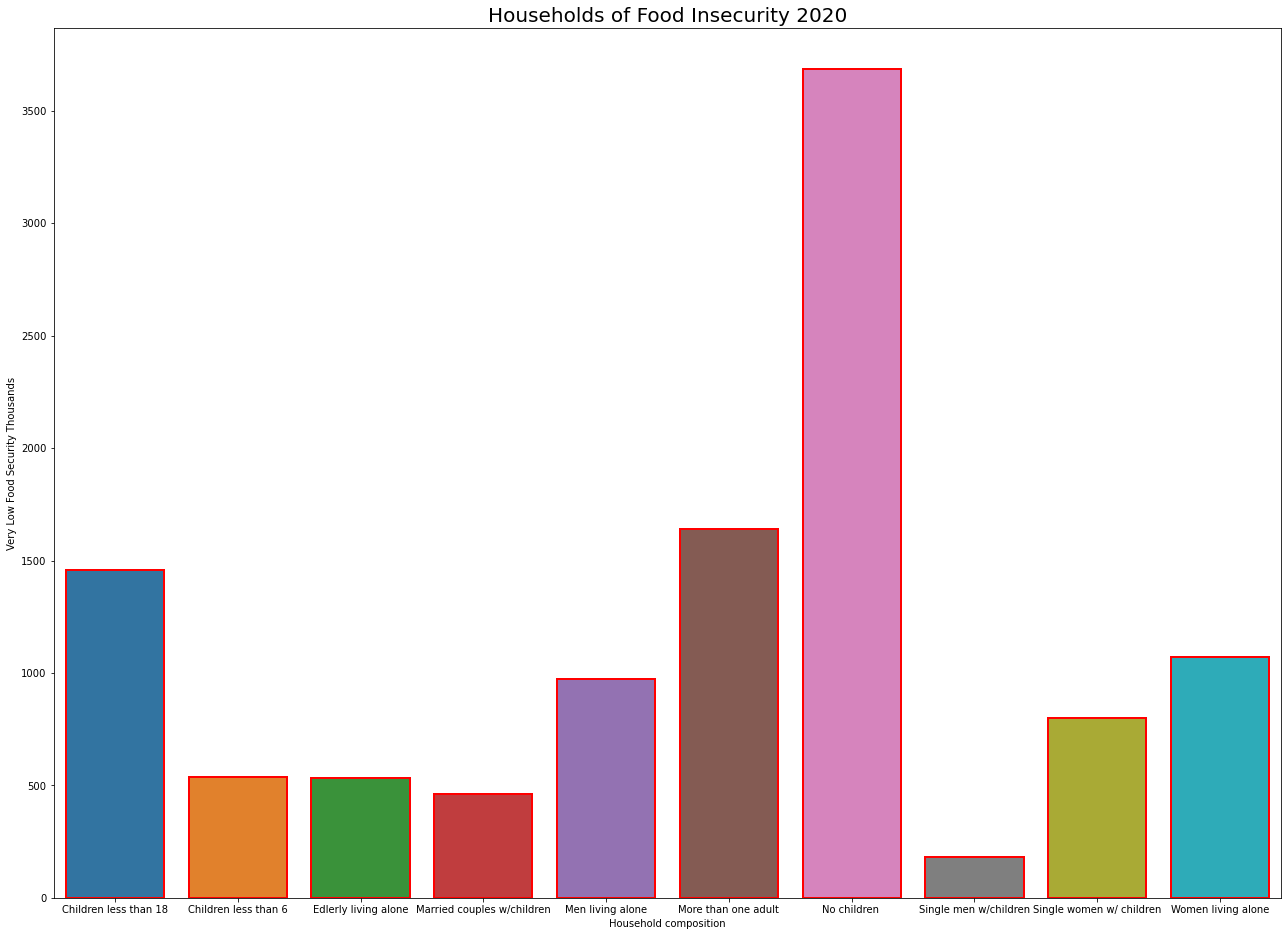

In [94]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Household composition').max()[['Food insecurity Thousands', 'Very Low Food Security Thousands']].sort_values(by = ['Household composition'], ascending = True).reset_index()
fig = plt.figure(figsize=(22,16))
plt.title("Households of Food Insecurity 2020", size = 20)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Very Low Food Security Thousands", x = "Household composition", linewidth = 2, edgecolor = 'red')
plt.xlabel("Household composition")
plt.ylabel("Very Low Food Security Thousands")
plt.show()

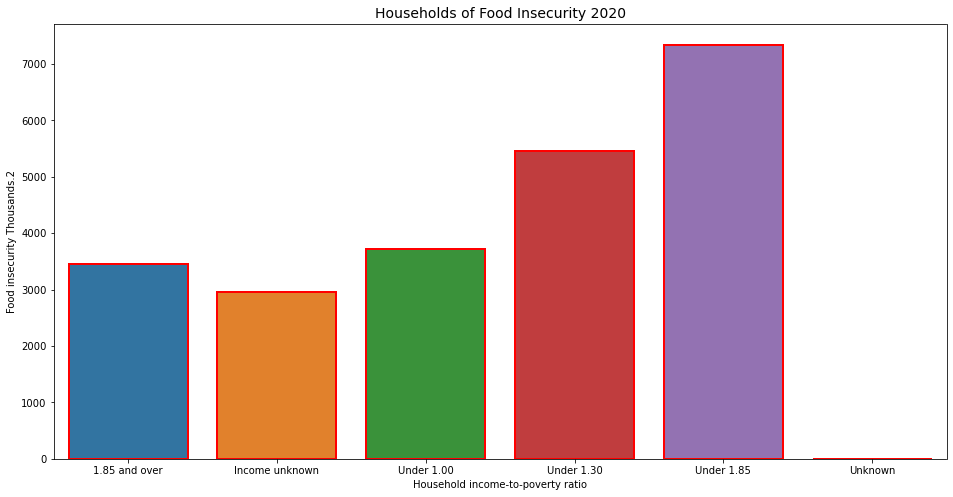

In [97]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Household income-to-poverty ratio').median()[['Food insecurity Thousands.2','Very Low Food Security Percent.2']].sort_values(by = ['Household income-to-poverty ratio'], ascending = True).reset_index()
fig = plt.figure(figsize=(16,8))
plt.title("Households of Food Insecurity 2020", size = 14)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Food insecurity Thousands.2", x = "Household income-to-poverty ratio", linewidth = 2, edgecolor = 'red')
plt.xlabel("Household income-to-poverty ratio")
plt.ylabel("Food insecurity Thousands.2")
plt.show()

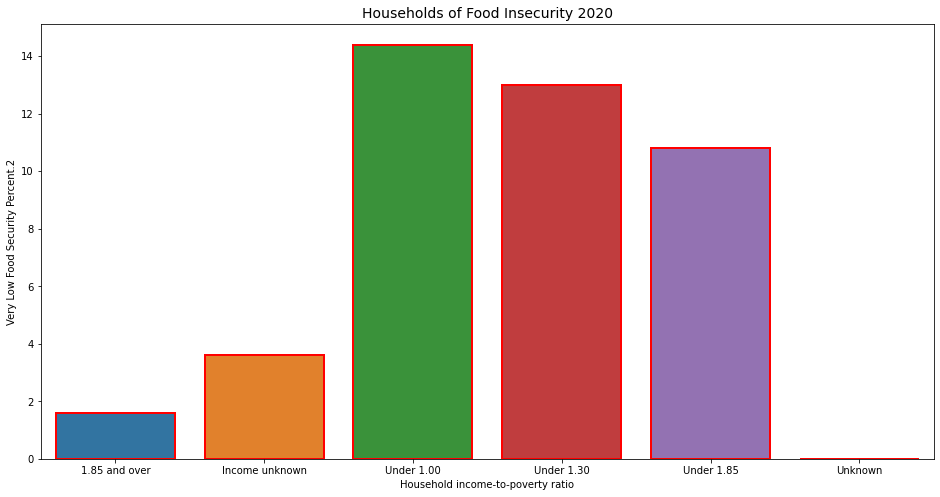

In [98]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Household income-to-poverty ratio').median()[['Food insecurity Thousands.2','Very Low Food Security Percent.2']].sort_values(by = ['Household income-to-poverty ratio'], ascending = True).reset_index()
fig = plt.figure(figsize=(16,8))
plt.title("Households of Food Insecurity 2020", size = 14)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Very Low Food Security Percent.2", x = "Household income-to-poverty ratio", linewidth = 2, edgecolor = 'red')
plt.xlabel("Household income-to-poverty ratio")
plt.ylabel("Very Low Food Security Percent.2")
plt.show()

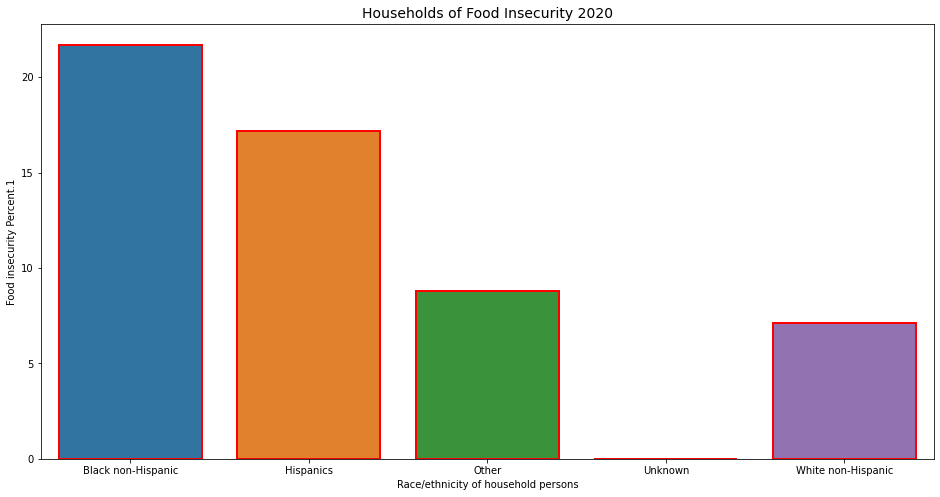

In [99]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Race/ethnicity of household persons').median()[['Food insecurity Percent.1','Very Low Food Security Thousands.1']].sort_values(by = ['Race/ethnicity of household persons'], ascending = True).reset_index()
fig = plt.figure(figsize=(16,8))
plt.title("Households of Food Insecurity 2020", size = 14)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Food insecurity Percent.1", x = "Race/ethnicity of household persons", linewidth = 2, edgecolor = 'red')
plt.xlabel("Race/ethnicity of household persons")
plt.ylabel("Food insecurity Percent.1")
plt.show()

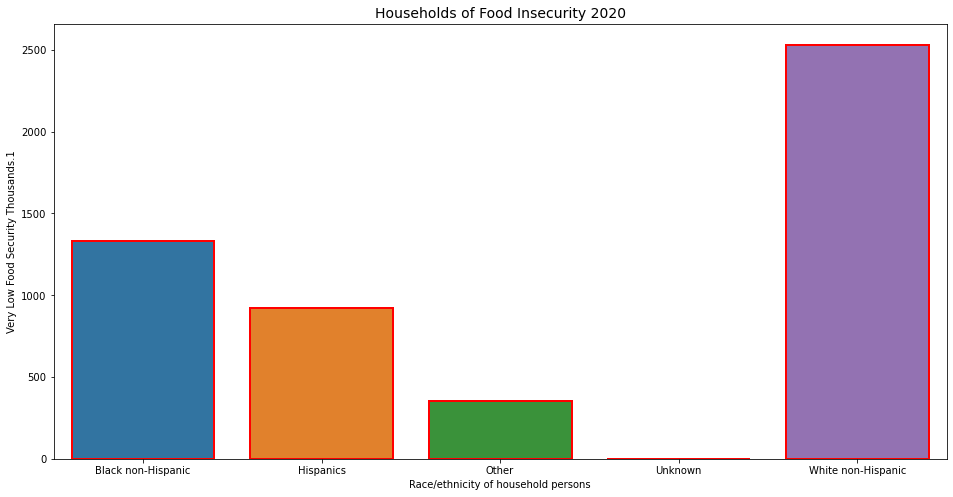

In [100]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Race/ethnicity of household persons').median()[['Food insecurity Percent.1','Very Low Food Security Thousands.1']].sort_values(by = ['Race/ethnicity of household persons'], ascending = True).reset_index()
fig = plt.figure(figsize=(16,8))
plt.title("Households of Food Insecurity 2020", size = 14)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Very Low Food Security Thousands.1", x = "Race/ethnicity of household persons", linewidth = 2, edgecolor = 'red')
plt.xlabel("Race/ethnicity of household persons")
plt.ylabel("Very Low Food Security Thousands.1")
plt.show()

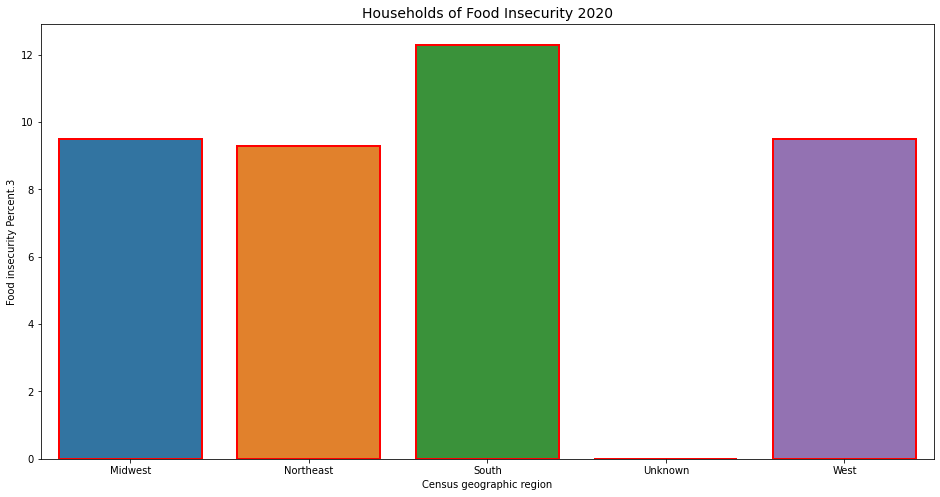

In [103]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Census geographic region').median()[['Food insecurity Percent.3','Very Low Food Security Percent.3']].sort_values(by = ['Census geographic region'], ascending = True).reset_index()
fig = plt.figure(figsize=(16,8))
plt.title("Households of Food Insecurity 2020", size = 14)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Food insecurity Percent.3", x = "Census geographic region", linewidth = 2, edgecolor = 'red')
plt.xlabel("Census geographic region")
plt.ylabel("Food insecurity Percent.3")
plt.show()

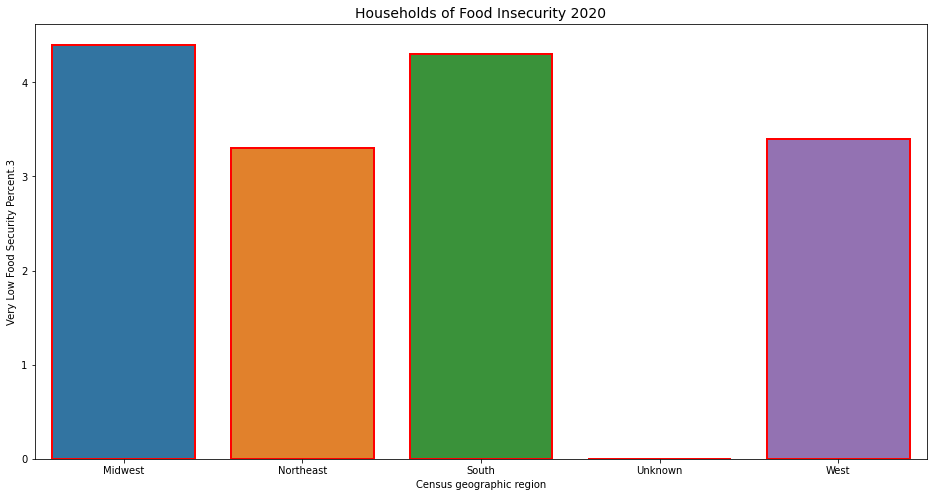

In [105]:
# Households of Food Insecurity 2020

Households_of_highest_Food_Insufficiency = Insecurity_households.groupby(by = 'Census geographic region').median()[['Food insecurity Percent.3','Very Low Food Security Percent.3']].sort_values(by = ['Census geographic region'], ascending = True).reset_index()
fig = plt.figure(figsize=(16,8))
plt.title("Households of Food Insecurity 2020", size = 14)
ax = sns.barplot(data = Households_of_highest_Food_Insufficiency.iloc[:10], y = "Very Low Food Security Percent.3", x = "Census geographic region", linewidth = 2, edgecolor = 'red')
plt.xlabel("Census geographic region")
plt.ylabel("Very Low Food Security Percent.3")
plt.show()

# Create a Contingency Table

In [106]:
Insecurity_households2_crosstab = pd.crosstab(Insecurity_households['Food insecurity Thousands'], Insecurity_households['Very Low Food Security Thousands'])
Insecurity_households2_crosstab.head()

Very Low Food Security Thousands,181,460,531,537,799,971,1073,1457,1640,3684
Food insecurity Thousands,,,,,,,,,,
538,1,0,0,0,0,0,0,0,0,0
1286,0,0,1,0,0,0,0,0,0,0
1941,0,0,0,0,0,1,0,0,0,0
2302,0,0,0,0,0,0,1,0,0,0
2329,0,1,0,0,0,0,0,0,0,0


In [107]:
stats.chi2_contingency(Insecurity_households2_crosstab)

(90.0,
 0.23134171389514102,
 81,
 array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]))

# Correlation

In [108]:
Insecurity_households['Food insecurity Percent'].corr(Insecurity_households['Food insecurity Percent.1'])

0.29749353909541953

In [109]:
Insecurity_households['Food insecurity Percent.2'].corr(Insecurity_households['Food insecurity Percent.3'])

0.824144813667401

In [110]:
Insecurity_households['Very Low Food Security Percent.1'].corr(Insecurity_households['Very Low Food Security Percent.3'])

0.9409663705623111

In [111]:
Insecurity_households.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Food insecurity Thousands,Food insecurity Percent,Food insecurity Thousands.1,Food insecurity Percent.1,Food insecurity Thousands.2,Food insecurity Percent.2,Food insecurity Thousands.3,Food insecurity Percent.3,Very Low Food Security Thousands,Very Low Food Security Percent,Very Low Food Security Thousands.1,Very Low Food Security Percent.1,Very Low Food Security Thousands.2,Very Low Food Security Percent.2,Very Low Food Security Thousands.3,Very Low Food Security Percent.3
Food insecurity Thousands,1.0,-0.18,0.23,-0.084,-0.17,0.064,-0.063,0.031,0.93,-0.18,0.27,-0.056,-0.16,0.075,-0.15,-0.069
Food insecurity Percent,-0.18,1.0,0.18,0.3,0.37,0.17,0.26,0.47,-0.31,0.78,0.21,0.38,0.34,0.17,0.22,0.42
Food insecurity Thousands.1,0.23,0.18,1.0,0.69,0.71,0.95,0.63,0.8,-0.13,-0.35,0.99,0.71,0.73,0.95,0.64,0.79
Food insecurity Percent.1,-0.084,0.3,0.69,1.0,0.89,0.82,0.84,0.89,-0.34,-0.28,0.61,0.99,0.88,0.79,0.9,0.93
Food insecurity Thousands.2,-0.17,0.37,0.71,0.89,1.0,0.85,0.91,0.9,-0.45,-0.23,0.62,0.85,1.0,0.83,0.93,0.9
Food insecurity Percent.2,0.064,0.17,0.95,0.82,0.85,1.0,0.71,0.82,-0.28,-0.41,0.91,0.82,0.87,1.0,0.73,0.84
Food insecurity Thousands.3,-0.063,0.26,0.63,0.84,0.91,0.71,1.0,0.92,-0.32,-0.27,0.53,0.78,0.89,0.68,0.99,0.88
Food insecurity Percent.3,0.031,0.47,0.8,0.89,0.9,0.82,0.92,1.0,-0.29,-0.12,0.74,0.89,0.89,0.8,0.94,0.99
Very Low Food Security Thousands,0.93,-0.31,-0.13,-0.34,-0.45,-0.28,-0.32,-0.29,1.0,-0.096,-0.093,-0.33,-0.45,-0.27,-0.41,-0.39
Very Low Food Security Percent,-0.18,0.78,-0.35,-0.28,-0.23,-0.41,-0.27,-0.12,-0.096,1.0,-0.28,-0.2,-0.26,-0.41,-0.34,-0.2


In [88]:
#View columns and (copy & paste to make new dataframe)
Insecurity_households.columns

Index(['Household composition', 'Food insecurity Thousands',
       'Food insecurity Percent', 'Race/ethnicity of household persons',
       'Food insecurity Thousands.1', 'Food insecurity Percent.1',
       'Household income-to-poverty ratio', 'Food insecurity Thousands.2',
       'Food insecurity Percent.2', 'Census geographic region',
       'Food insecurity Thousands.3', 'Food insecurity Percent.3',
       'Household composition VLFS', 'Very Low Food Security Thousands',
       'Very Low Food Security Percent',
       'Race/ethnicity of household persons VLFS',
       'Very Low Food Security Thousands.1',
       'Very Low Food Security Percent.1',
       'Household income-to-poverty ratio VLFS',
       'Very Low Food Security Thousands.2',
       'Very Low Food Security Percent.2', 'Census geographic region VLFS',
       'Very Low Food Security Thousands.3',
       'Very Low Food Security Percent.3'],
      dtype='object')

In [113]:
#New Dataframe with only columns with numbers
Insecurity_households1 = Insecurity_households[['Household composition', 'Food insecurity Percent', 'Household income-to-poverty ratio', 'Food insecurity Percent.2','Census geographic region VLFS','Very Low Food Security Percent.3']]
Insecurity_households1.head()

,Household composition,Food insecurity Percent,Household income-to-poverty ratio,Food insecurity Percent.2,Census geographic region VLFS,Very Low Food Security Percent.3
0,Children less than 18,14.8,Under 1.00,35.3,Northeast,3.3
1,Children less than 6,15.3,Under 1.30,33.1,Midwest,4.4
2,Married couples w/children,9.5,Under 1.85,28.6,South,4.3
3,Single women w/ children,27.4,1.85 and over,4.9,West,3.4
4,Single men w/children,16.3,Income unknown,8.7,Unknown,0.0


# Correlation

In [114]:
Insecurity_households1.corr()

,Food insecurity Percent,Food insecurity Percent.2,Very Low Food Security Percent.3
Food insecurity Percent,1.000000,0.173339,0.420185
Food insecurity Percent.2,0.173339,1.000000,0.836736
Very Low Food Security Percent.3,0.420185,0.836736,1.000000


# Seaborn Correlation Heatmap

<AxesSubplot:>

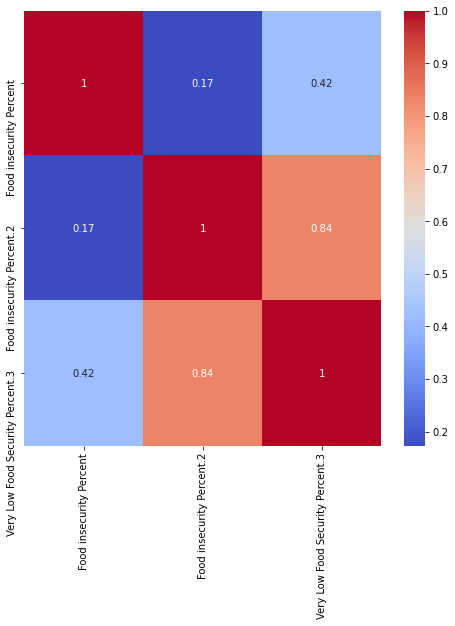

In [117]:
plt.figure(figsize=(8,8))
seaborn.heatmap(Insecurity_households1.corr(), annot=True, cmap='coolwarm')

# Matplotlib Correlation Heatmap

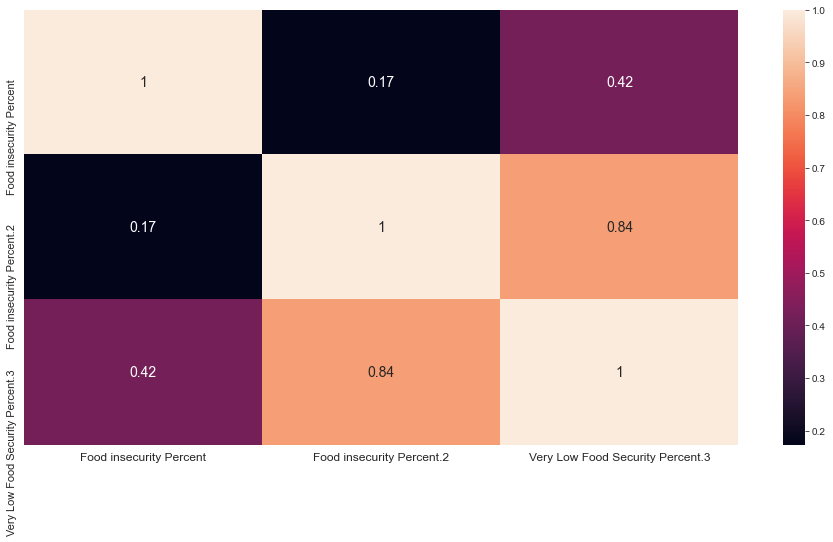

In [119]:
plt.figure(figsize=(16,8))
sns.heatmap(Insecurity_households1.corr(), annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.show()